In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import yfinance as yf

#tickers list
tickers=['RELIANCE.NS', 'HDFCBANK.NS', 'TCS.NS']
balance_sheet={}
income_statement={}
cash_flow={}

#getting data for the companies
for ticker in tickers:
    stock=yf.Ticker(ticker)

    #getting balance sheet
    bs=stock.balance_sheet
    balance_sheet[ticker]=bs
    bs.to_csv("{ticker}_balance_sheet.csv")

    #getting income statements
    is_df=stock.financials
    income_statement[ticker]=is_df
    is_df.to_csv("{ticker}_income_statement.csv")

    #getting cash flow
    cf=stock.cashflow
    cash_flow[ticker]=cf
    cf.to_csv("{ticker}_cash_flow.csv")
year = '2023-03-31'

df_is_rel=income_statement['RELIANCE.NS']
df_is_tcs=income_statement['TCS.NS']
df_is_hdfc=income_statement['HDFCBANK.NS']
df_bs_rel=balance_sheet['RELIANCE.NS']
df_bs_tcs=balance_sheet['TCS.NS']
df_bs_hdfc=balance_sheet['HDFCBANK.NS']
df_cf_rel=cash_flow['RELIANCE.NS']
df_cf_tcs=cash_flow['TCS.NS']
df_cf_hdfc=cash_flow['HDFCBANK.NS']
#calculating different ratios 
# calculating net profit margin
def calculate_net_profit_margin(income_statement_df):
    if "Gross Profit" in income_statement_df.index:
        gross_profit = income_statement_df.loc['Gross Profit']
        total_revenue = income_statement_df.loc['Total Revenue']
        net_profit_margin = (gross_profit / total_revenue)
    else:
        net_income = income_statement_df.loc['Net Income']
        total_revenue = income_statement_df.loc['Total Revenue']
        net_profit_margin = (net_income / total_revenue)
    return net_profit_margin


# calculating return on equity
def calculate_return_on_equity(income_statement_df, balance_sheet_df):
    net_income = income_statement_df.loc['Net Income']
    shareholders_equity = balance_sheet_df.loc['Common Stock Equity']
    return_on_equity = (net_income / shareholders_equity)
    return return_on_equity


# calculating return on asset
def calculate_return_on_asset(income_statement_df, balance_sheet_df):
    net_income = income_statement_df.loc['Net Income']
    total_assets = balance_sheet_df.loc['Total Assets']
    return_on_asset = (net_income / total_assets)
    return return_on_asset


# calculating current ratio
def calculate_current_ratio(balance_sheet_df):
    if "Current Assets" in balance_sheet_df.index and "Current Liabilities" in balance_sheet_df.index:
        current_assets = balance_sheet_df.loc['Current Assets']
        current_liabilities = balance_sheet_df.loc['Current Liabilities']
        current_ratio = (current_assets / current_liabilities)
    else:
        current_ratio = None
    return current_ratio


# calculating quick ratio
def calculate_quick_ratio(balance_sheet_df):
    if "Inventory" in balance_sheet_df.index and "Current Assets" in balance_sheet_df.index:
        current_assets = balance_sheet_df.loc['Current Assets']
        current_liabilities = balance_sheet_df.loc['Current Liabilities']
        inventory = balance_sheet_df.loc['Inventory']
        quick_ratio = ((current_assets - inventory) / current_liabilities)
    else:
        quick_ratio = None
    return quick_ratio


# calculating debt to equity
def calculate_debt_to_equity(balance_sheet_df):
    total_debt = balance_sheet_df.loc['Total Debt']
    stockholders_equity = balance_sheet_df.loc['Stockholders Equity']
    debt_to_equity = (total_debt / stockholders_equity)
    return debt_to_equity


# calculating Interest coverage ratio
def calculate_Interest_coverage_ratio(income_statement_df):
    if "EBIT" in income_statement_df.index:
        EBIT = income_statement_df.loc["EBIT"]
    elif "Pretax Income" in income_statement_df.index:
        EBIT = income_statement_df.loc["Pretax Income"]
    else:
        return None
    interest_expense = income_statement_df.loc['Interest Expense']
    interest_coverage_ratio = (EBIT / interest_expense)
    return interest_coverage_ratio


# calculating asset turnover ratio
def calculate_asset_turnover_ratio(income_statement_df, balance_sheet_df):
    if "Total Revenue" in income_statement_df.index:
        net_sales = income_statement_df.loc['Total Revenue']
        total_assets = balance_sheet_df.loc['Total Assets']
        asset_turnover_ratio = (net_sales / total_assets)
    else:
        asset_turnover_ratio = None
    return asset_turnover_ratio


# calculating Inventory turnover ratio
def calculate_Inventory_turnover_ratio(income_statement_df, balance_sheet_df):
    if "Reconciled Cost Of Revenue" in income_statement_df.index and "Inventory" in balance_sheet_df.index:
        cost_of_revenue = income_statement_df.loc['Reconciled Cost Of Revenue']
        inventory = balance_sheet_df.loc['Inventory']
        inventory_turnover_ratio = (cost_of_revenue / inventory)
    else:
        inventory_turnover_ratio = None
    return inventory_turnover_ratio


# main function to collect all ratios
def calculate_all_ratios(income_statement_df, balance_sheet_df):
    ratios_df = pd.DataFrame({
        "Interest Coverage Ratio": calculate_Interest_coverage_ratio(income_statement_df),
        "Asset Turnover Ratio": calculate_asset_turnover_ratio(income_statement_df, balance_sheet_df),
        "Inventory Turnover Ratio": calculate_Inventory_turnover_ratio(income_statement_df, balance_sheet_df),
        "Net Profit Margin": calculate_net_profit_margin(income_statement_df),
        "Return on Equity": calculate_return_on_equity(income_statement_df, balance_sheet_df),
        "Return on Asset": calculate_return_on_asset(income_statement_df, balance_sheet_df),
        "Current Ratio": calculate_current_ratio(balance_sheet_df),
        "Quick Ratio": calculate_quick_ratio(balance_sheet_df),
        "Debt to Equity": calculate_debt_to_equity(balance_sheet_df)
    }).T
    return ratios_df



df_ratios_rel = calculate_all_ratios(df_is_rel, df_bs_rel)
print(df_ratios_rel)

df_ratios_hdfc = calculate_all_ratios(df_is_hdfc, df_bs_hdfc)
print(df_ratios_hdfc)

df_ratios_tcs = calculate_all_ratios(df_is_tcs, df_bs_tcs)
print(df_ratios_tcs)


                          2025-03-31  2024-03-31  2023-03-31  2022-03-31  \
Interest Coverage Ratio     5.368412    5.530106    5.960755    6.690123   
Asset Turnover Ratio        0.494684    0.513138    0.546111    0.464079   
Inventory Turnover Ratio    4.674898    4.164267    4.798997    4.933085   
Net Profit Margin           0.292184    0.293974    0.234596    0.236054   
Return on Equity            0.082600    0.087741    0.093176    0.077878   
Return on Asset             0.035715    0.039648    0.041496    0.040479   
Current Ratio               1.100351    1.183037    1.074677    1.124269   
Quick Ratio                 0.778442    0.798582    0.720892    0.775091   
Debt to Equity              0.438301    0.436232    0.467111    0.361744   

                          2021-03-31  
Interest Coverage Ratio          NaN  
Asset Turnover Ratio             NaN  
Inventory Turnover Ratio         NaN  
Net Profit Margin                NaN  
Return on Equity                 NaN  
Retur

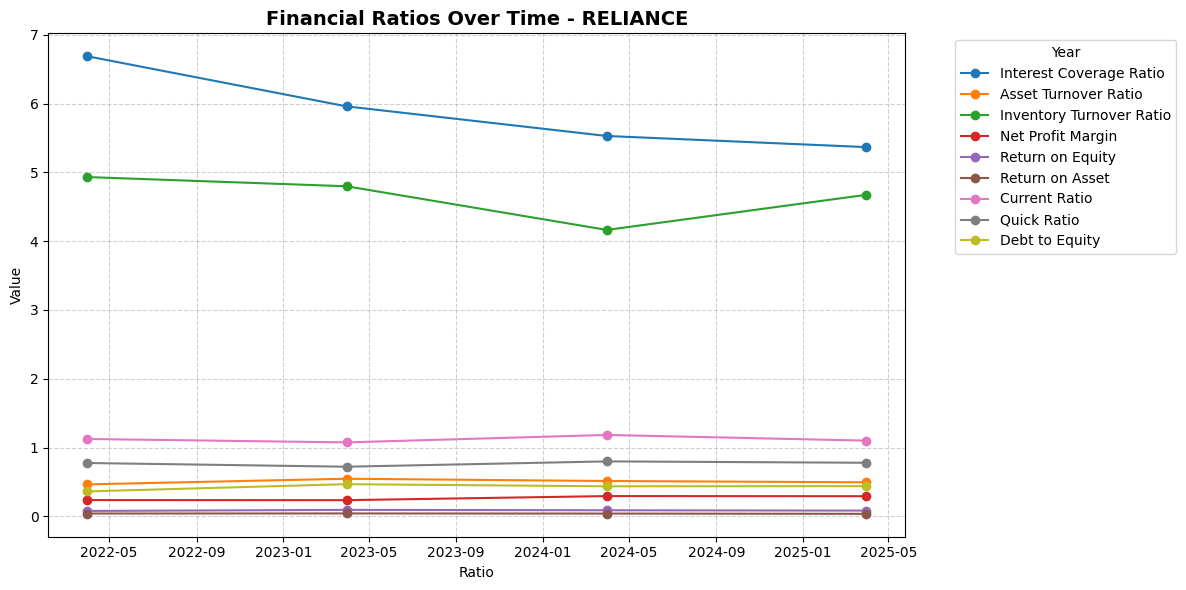

In [21]:
#plotting the ratios
def plot_ratios(df_ratios, company_name):
    plt.figure(figsize=(12, 6))

    # Transpose so ratios become x-axis
    df_ratios_T = df_ratios.T  

    for column in df_ratios_T.columns:   # each column = year
        plt.plot(df_ratios_T.index, df_ratios_T[column], marker="o", label=str(column))

    plt.title(f"Financial Ratios Over Time - {company_name}", fontsize=14, weight="bold")
    plt.xlabel("Ratio")
    plt.ylabel("Value")
    plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
plot_ratios(df_ratios_rel, "RELIANCE")

## Insights for Reliance

- **Profitability**:  
  Reliance shows **moderate profitability** with stable net profit margins and returns. However, compared to TCS and HDFC, its margins are thinner, reflecting the capital-intensive nature of its diverse businesses.  

- **Efficiency**:  
  The **asset turnover and inventory turnover ratios are steady**, suggesting Reliance manages its large-scale operations efficiently, though without major improvements across the years.  

- **Liquidity & Leverage**:  
  Current and quick ratios remain **slightly above 1**, indicating Reliance can meet short-term obligations but without a strong liquidity cushion. Debt-to-Equity levels are moderate, pointing towards reliance on external funding but still under control.  

**Interpretation**:  
Reliance demonstrates **balanced financial health**, with controlled leverage and stable efficiency. However, its profitability margins are lower than IT/financial peers, reflecting its heavy investments and capital structure.



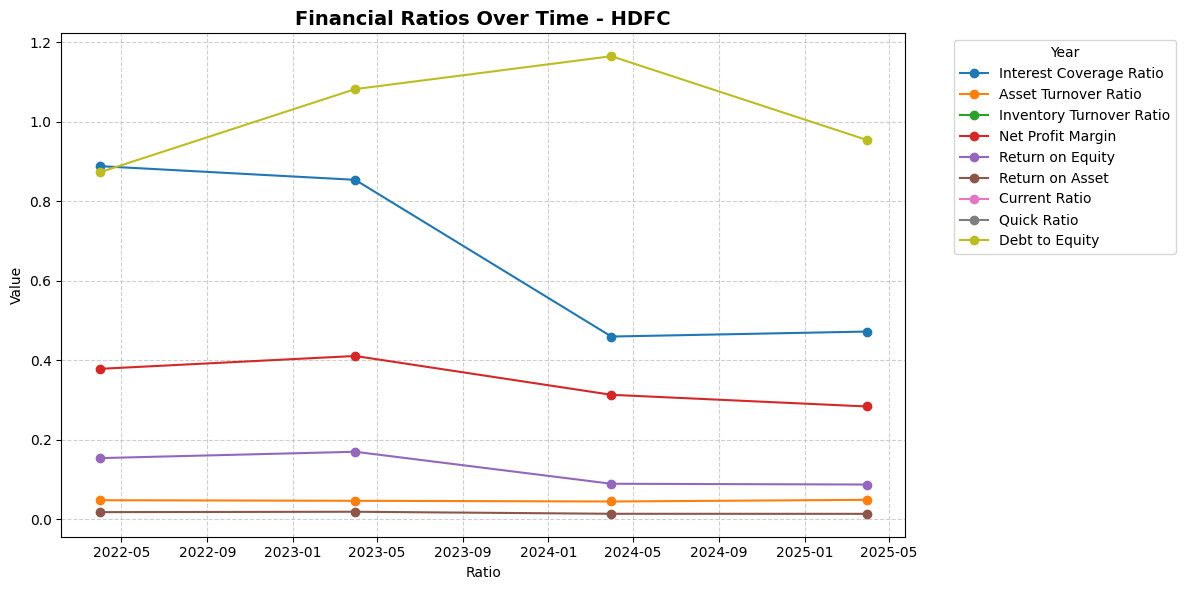

In [23]:
plot_ratios(df_ratios_hdfc, "HDFC")

## Insights for HDFC

- **Profitability**:  
  HDFC shows relatively **strong net profit margins and ROE**, making it more profitable than Reliance. However, there is a **decline in profitability trends after 2023**, which may indicate rising operational costs or narrowing interest spreads.  

- **Leverage & Risk**:  
  The **Debt-to-Equity ratio has increased steadily**, pointing towards higher reliance on borrowings. Combined with the **falling Interest Coverage Ratio**, this signals that HDFC’s ability to comfortably meet interest obligations is under some pressure.  

- **Liquidity & Stability**:  
  Current and quick ratios remain low (typical for banks, where liquidity structures differ from manufacturing firms). This is not alarming but reflects the sector’s nature.  

**Interpretation**:  
HDFC is financially profitable but needs to manage leverage carefully. A focus on maintaining interest coverage and controlling rising debt levels will be crucial for sustaining long-term stability.


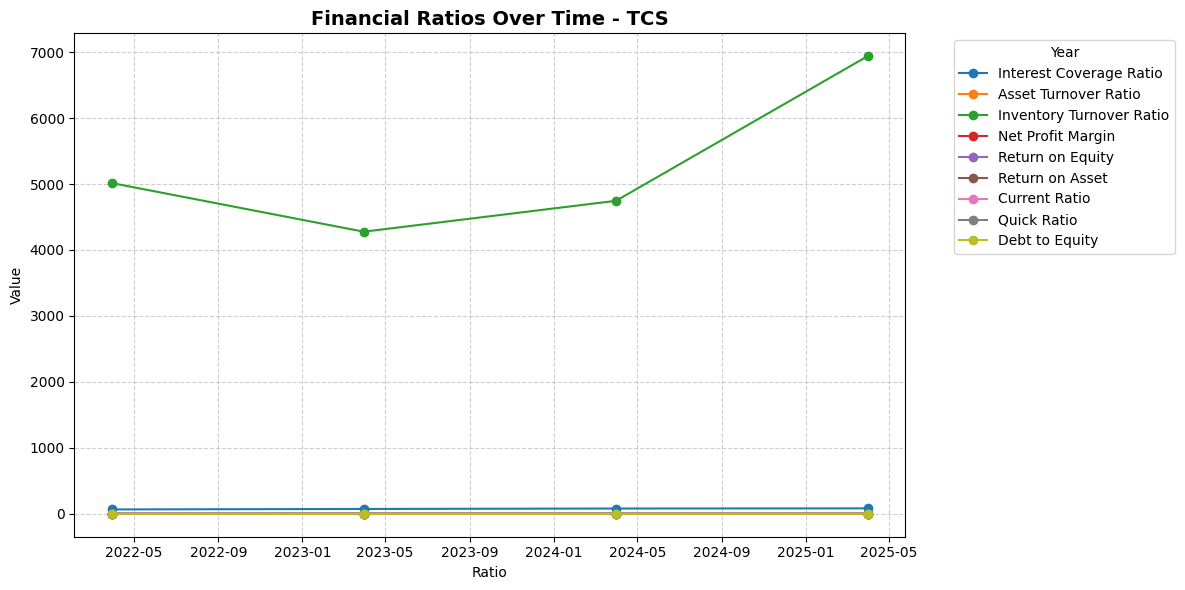

In [24]:
plot_ratios(df_ratios_tcs, "TCS")

## Insights for TCS

- **Efficiency & Operations**:  
  TCS displays an **extremely high inventory turnover ratio**, which is expected for IT services (where "inventory" largely represents work-in-progress rather than physical goods). This highlights an **asset-light model** with quick conversion of resources into revenues.  

- **Profitability**:  
  Net profit margin and return ratios remain **stable and strong**, reflecting consistent cash flows from operations and strong client retention.  

- **Liquidity & Leverage**:  
  Liquidity is well-managed, with current and quick ratios showing **stable short-term financial health**. Debt-to-Equity is negligible, reinforcing the company’s **low-risk capital structure**.  

**Interpretation**:  
TCS emerges as the **most financially stable** among the three companies, with minimal leverage and consistent efficiency. Its IT service-driven model allows it to maintain high margins, low debt, and steady growth.
